# Make final classifier using mutant concentration
**Goal**: Identify patients that don't respond.
These patients we don't have to treat.

Perform the following steps:

1) Combine data with CNV.

2) Compare harmonic versus delta.

3) Compare clinical data versus clinical and genomic data.

4) Select best classification model based on AUC.

5) For this best model, compare number of molecules.

6) Perform cross validation.

7) Make plots for parameter importance.

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV

from pipelines import benchmark_pipelines, build_classifier_pipelines, pipeline_Freeman, test_scores_pipelines
from views import view_linear_model_freeman

# 1) Combine data

In [2]:
from source import read_preprocessed_data
from transform import combine_tsv_files

In [3]:
# Difference genomic variable.
X_train_diff, y_train = combine_tsv_files(
    "output/train__gene__difference__No. Mutant Molecules per mL.tsv",
    "output/train__gene__difference__CNV Score.tsv",
)

# Difference genomic variable.
X_test_diff, y_test = combine_tsv_files(
    "output/test__gene__difference__No. Mutant Molecules per mL.tsv",
    "output/test__gene__difference__CNV Score.tsv",
)

# 2) Select best model

In [4]:
y_train_resp = y_train["response_grouped"]
y_test_resp = y_test['response_grouped']

response_labels = ['non responder (sd+pd)', 'responder (pr+cr)', 'non evaluable (ne)']
pos_label = 'responder (pr+cr)'
y_train_resp = y_train_resp == pos_label
y_test_resp = y_test_resp == pos_label

In [5]:
ps_class = build_classifier_pipelines()

In [6]:
b_difference = benchmark_pipelines(
    ps_class, X_train_diff, y_train_resp, metric='roc_auc',
)

In [7]:
# print('On average harmonic mean is better by', (b_harmonic_mean.mean(axis=1) - b_difference.mean(axis=1)).mean(), 'ROC AUC')
b_difference

,Richard mean,Richard std,Julian mean,Julian std,Freeman mean,Freeman std
DecisionTreeClassifier,0.534303,0.051893,0.642789,0.092760,0.634813,0.063893
RandomForestClassifier,0.637211,0.045885,0.654167,0.037763,0.600986,0.042447
GaussianNB,0.552109,0.101828,0.634779,0.116028,0.588452,0.092482
GradientBoostingClassifier,0.573844,0.018426,0.583793,0.074912,0.609813,0.110192
KNeighborsClassifier,0.643997,0.087592,0.604711,0.025374,0.629014,0.062816
LogisticRegression,0.638129,0.054355,0.597160,0.118240,0.626633,0.049826
SVC,0.543503,0.102596,0.464065,0.103102,0.574031,0.096345
DummyClassifier,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000


In [17]:
test_auc_roc = test_scores_pipelines(
    ps_class, 
    X_train_diff, y_train_resp,
    X_test_diff, y_test_resp,
    metric='roc_auc',
)
test_auc_roc

,Richard,Julian,Freeman
DecisionTreeClassifier,0.529915,0.636752,0.655983
RandomForestClassifier,0.476496,0.694444,0.532051
GaussianNB,0.416667,0.634615,0.621795
GradientBoostingClassifier,0.591880,0.514957,0.647436
KNeighborsClassifier,0.480769,0.555556,0.442308
LogisticRegression,0.549145,0.476496,0.529915
SVC,0.500000,0.500000,0.500000
DummyClassifier,0.500000,0.500000,0.500000


In [18]:
test_f1 = test_scores_pipelines(
    ps_class, 
    X_train_diff, y_train_resp,
    X_test_diff, y_test_resp,
    metric=f1_score,
)
test_f1

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

,Richard,Julian,Freeman
DecisionTreeClassifier,0.347826,0.484848,0.500000
RandomForestClassifier,0.222222,0.533333,0.315789
GaussianNB,0.240000,0.486486,0.461538
GradientBoostingClassifier,0.333333,0.250000,0.461538
KNeighborsClassifier,0.000000,0.200000,0.000000
LogisticRegression,0.363636,0.222222,0.347826
SVC,0.000000,0.000000,0.000000
DummyClassifier,0.000000,0.000000,0.000000


The prediction with difference instead of harmonic mean is therefore marginally worse.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


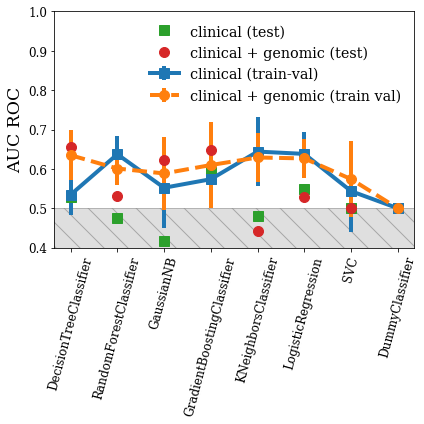

In [9]:
b = b_difference
plt.rc('font', family='serif')
import matplotlib
context = {
#     'font.size': 22,
    'lines.linewidth': 4,
    'figure.autolayout': True,
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large',
    'legend.fontsize': 'x-large',
    'axes.labelsize': 'xx-large',
    'axes.titlesize': 'xx-large',
}
# fig = plt.figure(figsize=(4, 3))
with plt.rc_context(context):
    fig = plt.figure(figsize=(6, 6))
    degrees=75
    plt.ylabel('AUC ROC')
    plt.xticks(rotation=degrees)
    plt.ylim([0.4, 1.0])
    plt.gca().fill_between([-1, 8], 0, 0.5, facecolor='grey', edgecolor='k', alpha=0.25, hatch='\\')
    plt.errorbar(
        b.index, 
        b['Richard mean'], 
        yerr=b['Richard std'], 
        fmt='s-', 
        markersize=10,
        label='clinical (train-val)',
    )
    plt.errorbar(
        b.index, 
        b['Freeman mean'], 
        yerr=b['Freeman std'], 
        fmt='o--', 
        markersize=10,
        label='clinical + genomic (train val)',
    )
    plt.plot(
        b.index, 
        test_scores['Richard'], 
        's', 
        markersize=10,
        label='clinical (test)',
    )
    plt.plot(
        b.index, 
        test_scores['Freeman'], 
        'o',
        markersize=10,
        label='clinical + genomic (test)',
    )
    plt.legend(frameon=False)
    plt.tight_layout()
plt.savefig('figs/comparison_classifiers.png', bbox_inches = 'tight')
plt.savefig('figs/comparison_classifiers.eps', bbox_inches = 'tight')

# 4) Choose model logistic regression.
The logistic regression model doesn't have the best accuracy in absolute terms, but is much simpler than the RandomForest. So by occams razor, we pick it.

In [10]:
random_state=1234
logistic_parameters = {
    "random_state": random_state,
    "penalty": "l2",
    "class_weight": "balanced",
    "solver": "newton-cg",
    "C": 1.0,
    "max_iter": 5000,
}
logistic_Freeman = pipeline_Freeman(LogisticRegression(**logistic_parameters))

# 6) Cross validation
Find the optimal hyper parameters for dataset with difference in mutant ceoncentration $\Delta x$.

In [11]:
logistic_regression_hyper_parameters = {
    "estimator__C": [0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.175, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 4.0],
    "estimator__class_weight": ["balanced", None],
}
clf_search = GridSearchCV(
    logistic_Freeman,
    logistic_regression_hyper_parameters,
    scoring="roc_auc",
    n_jobs=8,
    cv=5,
)

In [12]:
clf_search.fit(X_train_diff, y_train_resp)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('clinical_curation',
                                        FunctionTransformer(accept_sparse=False,
                                                            check_inverse=True,
                                                            func=<function clinical_data_curation at 0x7fc4a51b36a8>,
                                                            inv_kw_args=None,
                                                            inverse_func=None,
                                                            kw_args=None,
                                                            pass_y='deprecated',
                                                            validate=False)),
                                       ('filter_clinical_variables',
                                        FunctionTransf...
                                              

In [13]:
print("Best parameters set found on development set:")
print()
print(clf_search.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf_search.cv_results_['mean_test_score']
stds = clf_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'estimator__C': 0.025, 'estimator__class_weight': 'balanced'}

Grid scores on development set:

0.619 (+/-0.080) for {'estimator__C': 0.005, 'estimator__class_weight': 'balanced'}
0.623 (+/-0.082) for {'estimator__C': 0.005, 'estimator__class_weight': None}
0.620 (+/-0.089) for {'estimator__C': 0.01, 'estimator__class_weight': 'balanced'}
0.620 (+/-0.084) for {'estimator__C': 0.01, 'estimator__class_weight': None}
0.626 (+/-0.100) for {'estimator__C': 0.025, 'estimator__class_weight': 'balanced'}
0.624 (+/-0.097) for {'estimator__C': 0.025, 'estimator__class_weight': None}
0.623 (+/-0.100) for {'estimator__C': 0.05, 'estimator__class_weight': 'balanced'}
0.623 (+/-0.100) for {'estimator__C': 0.05, 'estimator__class_weight': None}
0.616 (+/-0.104) for {'estimator__C': 0.075, 'estimator__class_weight': 'balanced'}
0.616 (+/-0.115) for {'estimator__C': 0.075, 'estimator__class_weight': None}
0.610 (+/-0.108) for {'estimator__C': 0.1, 'estima

In [14]:
# Best parameters under L2 norm.
best_params = {
    "estimator__C": 0.025,
    "estimator__class_weight": 'balanced',
    "estimator__solver": "newton-cg",
}

In [15]:
# Pick the best parameteres.
logistic_Freeman.set_params(**best_params)
logistic_Freeman.fit(X_train_hm, y_train_resp)

NameError: name 'X_train_hm' is not defined

# 7) Make plots of the model

In [ ]:
figure_filenames = ("logistic_regression_clinical_freeman", "logistic_regression_genetic_freeman")
view_linear_model_freeman(
    X_train_diff, 
    y_train_resp, 
    logistic_Freeman, 
    filenames=figure_filenames, 
)